In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from bandit import BanditTypes as BT

def portions(bandits, nActions):
    ret = np.zeros(nActions)
    for action in range(nActions):
        ret[action] = np.sum(bandits == action)
    ret = ret / np.max(ret)
    return ret


# modified version of https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/two_scales.html
def hist_eval(r, env):
    ev = r[0] - (np.min(r[0]) if env == "G" else 0)
    bandits = portions(r[1], ev.size)
    actions = np.arange(ev.size)

    fig, ax1 = plt.subplots()

    color = 'tab:green'
    ax1.set_xlabel('action')
    ax1.set_ylabel('Relative E[a]', color=color)
    ax1.bar(actions, ev, alpha=0.5, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('% of ', color=color) 
    ax2.bar(actions, bandits, alpha=0.5, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    

t=99.9000999000999


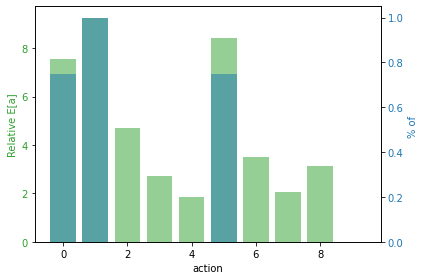

In [2]:
method = BT.GREEDY
env = "G"
r = gym.gains(method, env, k=10, N=100, T=1000)
hist_eval(r, env)


t=99.95002498750625


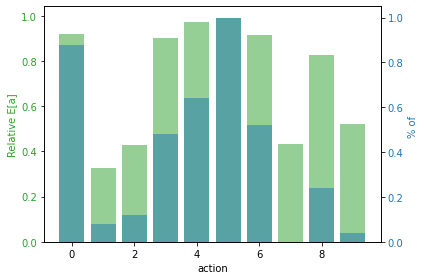

In [3]:
method = BT.OPTIMISTIC
env = "B"
qScales = 3
r = gym.gains(method, env, k=10, N=100, T=2000, extra=qScales)
hist_eval(r, env)

t=99.95002498750625


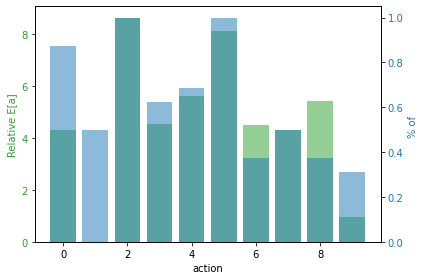

In [4]:
method = BT.EPSILON_GREEDY
env = "G"
epsilon = 0.9
r = gym.gains(method, env, k=10, N=100, T=2000, extra=epsilon)
hist_eval(r, env)

t=99.93337774816789


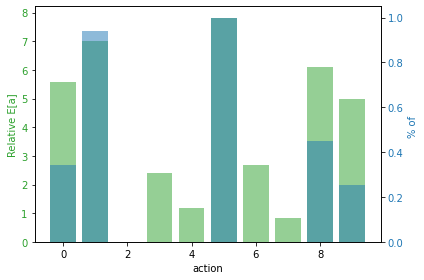

In [6]:
method = BT.UCB
env = "G"
r = gym.gains(method, env, k=10, N=200, T=1500)
hist_eval(r, env)

t=99.93337774816789


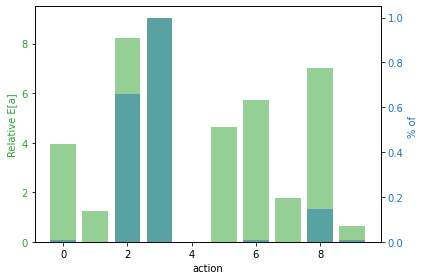

In [6]:
method = "soft_max"
env = "G"
r = gym.gains(method, env, k=10, N=200, T=1500)
hist_eval(r, env)

t=99.93337774816789


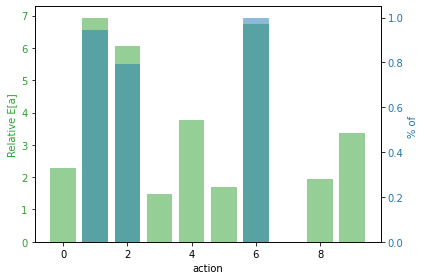

In [5]:
method = "AP"
env = "G"
r = gym.gains(method, env, k=10, N=200, T=1500)
hist_eval(r, env)